In [1]:
%load_ext iventure.magics
%matplotlib inline

session_id: fsaad@probcomp-1.csail.mit.edu_2017-12-17T10:40:49.570936_1


In [2]:
!rm -f regression.4.bdb
%bayesdb -j regression.4.bdb

u'Loaded: regression.4.bdb'

In [3]:
%mml CREATE TABLE satellites_t FROM 'satellites.csv';
%mml .nullify satellites_t 'NaN'

Nullified 3032 cells


In [4]:
%mml CREATE POPULATION satellites_p FOR satellites_t WITH SCHEMA (GUESS STATTYPES OF (*));
%mml CREATE GENERATOR satellites_m FOR satellites_p;
%mml INITIALIZE 8 MODELS FOR satellites_m;
%mml ANALYZE satellites_m FOR 250 ITERATION (OPTIMIZED);

Completed: 250 iterations in 68.929651 seconds.
Completed: 250 iterations in 69.745049 seconds.
Completed: 250 iterations in 72.854882 seconds.
Completed: 250 iterations in 73.203044 seconds.
Completed: 250 iterations in 74.964996 seconds.
Completed: 250 iterations in 76.350171 seconds.
Completed: 250 iterations in 78.399704 seconds.
Completed: 250 iterations in 80.120223 seconds.


""


In [5]:
%mml ANALYZE satellites_m FOR 10 SECONDS (SUBPROBLEM variable hyperparameters;);

Completed: 6 iterations in 10.063256 seconds.
Completed: 7 iterations in 10.072848 seconds.
Completed: 5 iterations in 10.084761 seconds.
Completed: 6 iterations in 10.658313 seconds.
Completed: 5 iterations in 10.768274 seconds.
Completed: 8 iterations in 11.351875 seconds.
Completed: 7 iterations in 11.420392 seconds.
Completed: 6 iterations in 11.490124 seconds.


""


### Plot a dependence heatmap

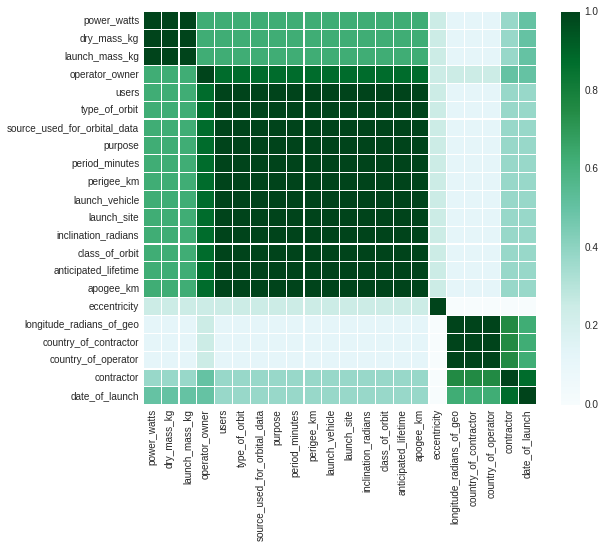

In [6]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites_p;

### Regress on simulations of Perigee | (Apogee_km, Class_of_Orbit)

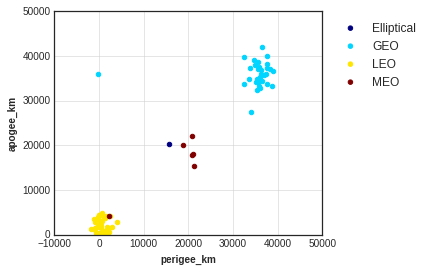

In [7]:
%%bql
.scatter --ymin=0 --ymax=50000
SIMULATE perigee_km, apogee_km, class_of_orbit FROM satellites_p LIMIT 100

In [8]:
%bql REGRESS perigee_km GIVEN (apogee_km, class_of_orbit) USING 100 samples by satellites_p

,variable,coefficient
0,apogee_km,-0.046650
1,class_of_orbit_dum_Elliptical,0.000000
2,class_of_orbit_dum_GEO,30893.581240
3,class_of_orbit_dum_LEO,-4605.395086
4,class_of_orbit_dum_MEO,14454.237004
5,intercept,5670.823325


In [9]:
%%bql
.regress_sql --table=satellites
REGRESS perigee_km GIVEN (apogee_km, class_of_orbit) USING 100 samples by satellites_p

SELECT
		3198.7090
	+	-0.1778  *  "apogee_km"
	+	CASE "class_of_orbit"
			WHEN 'MEO' THEN 15932.4383
			WHEN 'LEO' THEN -2247.8701
			WHEN 'GEO' THEN 38865.7261
			WHEN 'Elliptical' THEN 0.0000
			ELSE NULL
		END
FROM "satellites"


### Regress on simulations of Perigee | (Most Probably Dependent Variables)

In [10]:
%%bql
.regress_sql --table=satellites
REGRESS perigee_km GIVEN (
    p.(ESTIMATE * FROM VARIABLES OF satellites_p
        ORDER BY DEPENDENCE PROBABILITY WITH perigee_km DESC LIMIT 6))
USING 100 samples by satellites_p

SELECT
		7004.6927
	+	-0.0578  *  "apogee_km"
	+	CASE "type_of_orbit"
			WHEN 'Polar' THEN -2168.2685
			WHEN 'Sun-Synchronous' THEN -770.6827
			WHEN 'Cislunar' THEN 0.0000
			WHEN 'Molniya' THEN -529.1174
			WHEN 'Intermediate' THEN -476.3159
			WHEN 'Retrograde' THEN 1808.4760
			WHEN 'Deep Highly Eccentric' THEN -1562.2709
			ELSE NULL
		END
	+	CASE "class_of_orbit"
			WHEN 'MEO' THEN 8726.3399
			WHEN 'LEO' THEN -6033.5918
			WHEN 'GEO' THEN 29446.7334
			WHEN 'Elliptical' THEN 0.0000
			ELSE NULL
		END
	+	CASE "purpose"
			WHEN 'Earth Science/Meteorology' THEN 4789.8105
			WHEN 'Earth Observation/Technology Development' THEN 728.5697
			WHEN 'Surveillance' THEN -2673.7294
			WHEN 'Space Science' THEN 2260.3870
			WHEN 'Earth/Space Science' THEN -1358.9130
			WHEN 'Astrophysics' THEN 0.0000
			WHEN 'Meteorology/Navigation' THEN -4487.8506
			WHEN 'Radar Calibration' THEN 195.5385
			WHEN 'Technology Development' THEN 1390.6825
			WHEN 'Electronic Surveillance' THEN 306.7994
			WHE

### Regress on simulations of Perigee | (Everything)

In [11]:
%%bql
.regress_sql --table=satellites
REGRESS perigee_km GIVEN (*)
USING 100 samples by satellites_p

SELECT
		10066.4226
	+	-0.0531  *  "date_of_launch"
	+	40.3667  *  "longitude_radians_of_geo"
	+	0.4625  *  "apogee_km"
	+	-0.0058  *  "power_watts"
	+	-0.4170  *  "launch_mass_kg"
	+	-341.4818  *  "eccentricity"
	+	-28.7184  *  "anticipated_lifetime"
	+	6.1436  *  "period_minutes"
	+	-0.3004  *  "dry_mass_kg"
	+	-2577.3735  *  "inclination_radians"
	+	CASE "users"
			WHEN 'Government/Commercial' THEN -659.5830
			WHEN 'Commercial/Government' THEN -125.6112
			WHEN 'Commecial' THEN 444.2698
			WHEN 'Civil' THEN 0.0000
			WHEN 'Military/Commercial' THEN 455.0257
			WHEN 'Commercial/Government/Government' THEN -303.3823
			WHEN 'Government' THEN 315.5184
			WHEN 'Commercial' THEN 896.7965
			WHEN 'Civil/Commercial' THEN -885.7119
			WHEN 'Commerical' THEN 156.9922
			WHEN 'Military/Government' THEN -383.7194
			WHEN 'Military' THEN -260.6112
			WHEN 'Government/Civil' THEN -548.9357
			ELSE NULL
		END
	+	CASE "type_of_orbit"
			WHEN 'Polar' THEN 390.7454
			WHEN 'Sun-Synchronous' THEN -5